<a href="https://colab.research.google.com/github/HILALOZTEMEL/Flight_ticket_price_prediction/blob/main/flight_ticket_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti ve Gerekli kütüphanelerin eklenmesi

In [ ]:
import pandas as pd

# Veri setini yükleyin
data = pd.read_excel('/content/drive/MyDrive/YapayZeka/Dataset/Data_Train.xlsx')
data.to_csv('/content/drive/MyDrive/YapayZeka/Dataset/Data_Train.csv', index=False)
data = pd.read_csv('/content/drive/MyDrive/YapayZeka/Dataset/Data_Train.csv')


# Verilere genel bir bakış için ilk birkaç satırı görüntüleyin
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Veri Ön İşleme


In [ ]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [ ]:
# Eksik verileri kontrol edin ve gerekirse doldurun
print(data.isnull().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
data.dropna(inplace = True)

In [ ]:
# Eksik verileri kontrol edin ve gerekirse doldurun
print(data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
#veri kaybetmemk adına yeni iki stun oluşturup tarih verisinden yıl, ay ve gün değeri alınır
data['Month_Name'] = data['Date_of_Journey'].dt.month
data['Day_Name'] = data['Date_of_Journey'].dt.day
data['Year_Name'] = data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [ ]:
#Şimdi Dep_Time için de aynısını yapacağız.
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

#saat ve dakika verisi alınır
data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Min'] = data['Dep_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-31 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-31 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-31 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-07-31 18:05:00,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-07-31 16:50:00,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [ ]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Min'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-31 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-31 05:50:00,2023-07-31 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-31 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-07-31 18:05:00,2023-07-31 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-07-31 16:50:00,2023-07-31 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [ ]:
duration = data['Duration'].values.tolist()

duration_hours = []
duration_mins = []

for dur in duration:
    if "h" in dur:
        hours = int(dur.split("h")[0])
    else:
        hours = 0

    if "m" in dur:
        mins = int(dur.split("m")[0].split()[-1])
    else:
        mins = 0

    duration_hours.append(hours)
    duration_mins.append(mins)
data['Duration_Hours'] = duration_hours
data['Duration_Mins'] = duration_mins
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-31 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-31 05:50:00,2023-07-31 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-31 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-07-31 18:05:00,2023-07-31 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-07-31 16:50:00,2023-07-31 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [ ]:
#Gerekli dönüşümü yaptıktan sonra gereksiz sütunları silebiliriz.
data = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time','Duration'], axis=1)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Month_Name       10682 non-null  int64 
 8   Day_Name         10682 non-null  int64 
 9   Year_Name        10682 non-null  int64 
 10  Dep_Hour         10682 non-null  int64 
 11  Dep_Min          10682 non-null  int64 
 12  Arrival_Hour     10682 non-null  int64 
 13  Arrival_Min      10682 non-null  int64 
 14  Duration_Hours   10682 non-null  int64 
 15  Duration_Mins    10682 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


In [ ]:
#the airline sütunu is kategorik veriye çevirmrk için One-Hot Encoding kullanırız
airline = data['Airline']
airline = pd.get_dummies(airline, drop_first = True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dest = data[['Destination'] ]
dest = pd.get_dummies(dest, drop_first= True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
source= pd.get_dummies(data[['Source']], drop_first= True)
source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
#Yeni sutunları veri seti ile birleştirdik
data = pd.concat([data,airline,source,dest], axis = 1)
#Gereksiz kalanan sütünlar silinir.
data = data.drop(columns = ['Airline','Source','Destination'])
data.head()

,Route,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,3,24,2019,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4}, inplace =True)
data.head()

,Route,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,3,24,2019,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,2019,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,2019,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,5,12,2019,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,3,1,2019,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Source	Destination verisi elimizde olduğu için Route verisi gereksiz onu sileriz
data =  data.drop(columns = 'Route')
data.head()

,Total_Stops,Additional_Info,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,3,24,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,5,1,2019,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,6,9,2019,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,5,12,2019,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,3,1,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#additional_info verisinin çoğu no-info olduğu için sileriz, sonuca cokta bir etkisi olmaması sebebi ile
data= data.drop(columns = 'Additional_Info')
data.head()

,Total_Stops,Price,Month_Name,Day_Name,Year_Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Month_Name                         10682 non-null  int64
 3   Day_Name                           10682 non-null  int64
 4   Year_Name                          10682 non-null  int64
 5   Dep_Hour                           10682 non-null  int64
 6   Dep_Min                            10682 non-null  int64
 7   Arrival_Hour                       10682 non-null  int64
 8   Arrival_Min                        10682 non-null  int64
 9   Duration_Hours                     10682 non-null  int64
 10  Duration_Mins                      10682 non-null  int64
 11  Air India                          10682 non-null  uint8
 12  GoAir             

In [ ]:

# Bağımlı değişken (Fare) ve bağımsız değişkenleri (özellikler) ayırın
X = data.drop('Price', axis=1)
y = data['Price']

# Verileri eğitim ve test kümelerine bölelim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Model Eğitimi ve Sonuçların değerlendirilmesi

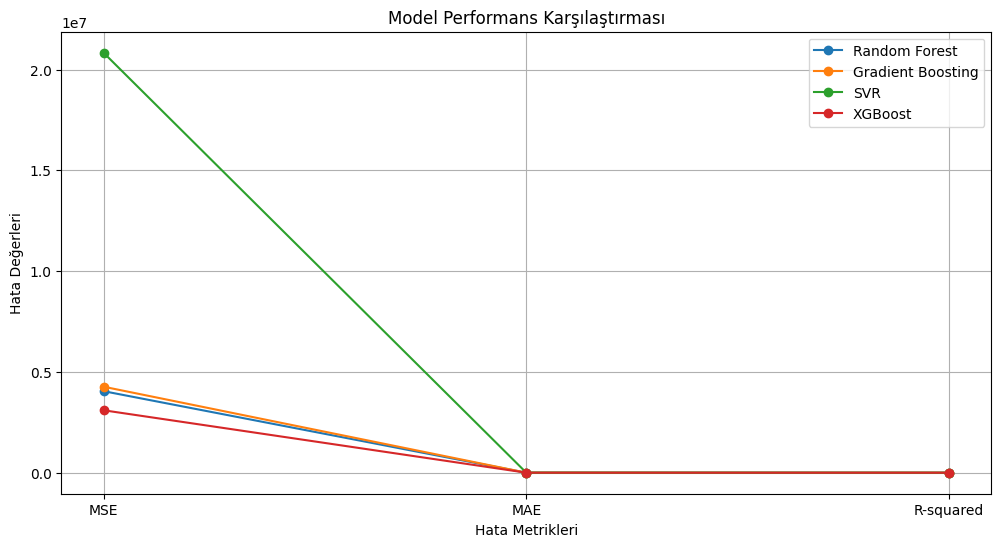

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Farklı algoritmaları kullanarak modeller oluşturun
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

results = {}  # Model performans sonuçlarını saklamak için bir sözlük
comparisons = {} # Model sonucunda tahmin değerleri ile gerçek değerleri karşılaştırmak için sözlük

# Modelleri eğitin ve performans sonuçlarını kaydedin
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    comparisons[name] = {'y_test' : y_test,'y_pred' : y_pred}
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

# Sonuçları görselleştirin
plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.plot(list(result.keys()), list(result.values()), marker='o', label=name)

plt.xlabel('Hata Metrikleri')
plt.ylabel('Hata Değerleri')
plt.title('Model Performans Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, result in results.items():
    print(f"{name} Modeli:")
    print("Mean Squared Error (MSE):", result['MSE'])
    print("Mean Absolute Error (MAE):", result['MAE'])
    print("R-squared:", result['R-squared'])
    print("\n")

Model Performans Sonuçları:
Random Forest Modeli:
Mean Squared Error (MSE): 4045733.421332119
Mean Absolute Error (MAE): 1170.699175166418
R-squared: 0.8016887416558479


Gradient Boosting Modeli:
Mean Squared Error (MSE): 4266933.334650546
Mean Absolute Error (MAE): 1489.7611604869726
R-squared: 0.7908461011287933


SVR Modeli:
Mean Squared Error (MSE): 20835587.366304684
Mean Absolute Error (MAE): 3610.77852415857
R-squared: -0.021305933595322957


XGBoost Modeli:
Mean Squared Error (MSE): 3098512.3580680643
Mean Absolute Error (MAE): 1145.3216503982426
R-squared: 0.848119037827989




In [ ]:
# Tahmin edilen değerlerle gerçek değerleri karşılaştırın
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, comparison in comparisons.items():
    print(f"{name} Modeli:")
    comparison_df = pd.DataFrame({'Gerçek Değerler': comparison['y_test'], 'Tahmin Edilen Değerler': comparison['y_pred'] })

    print(comparison_df)
    print("\n")



Model Performans Sonuçları:
Random Forest Modeli:
      Gerçek Değerler  Tahmin Edilen Değerler
6075            16655            16753.620000
3544             4959             5586.770000
9291             9187             8974.760000
5032             3858             3729.870000
2483            12898            14997.284500
...               ...                     ...
7917            16263            14610.440714
5858            10844            13315.014333
2689             5000             5804.310000
4486             3100             3269.100000
7877             6734             7041.930000

[3205 rows x 2 columns]


Gradient Boosting Modeli:
      Gerçek Değerler  Tahmin Edilen Değerler
6075            16655            15655.614929
3544             4959             7309.405809
9291             9187             9538.024557
5032             3858             4438.682673
2483            12898            12318.105254
...               ...                     ...
7917            16263  